# Chem 30324, Spring 2025, Homework 4

# Due February 21, 2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Schr&ouml;dinger developed a wave equation to describe the motion (mechanics) of quantum-scale particles moving in potentials. A proton (mass $m_p$) is moving in a one-dimensional potential given by

$$V(x) = \frac{1}{2} k x^ 2, \quad -\infty < x < \infty$$

### where $k$ is a positive, real number.

### 1. Write down the time-independent Schrödinger equation for this system. Remember to include the domain of the equation. Indicate the parts of the equation corresponding to the kinetic, potential, and total energies of the system. (*Hint*: Leave your expression in terms of $m_p$ and $k$.)

\begin{equation}
 - \frac{\hbar^{2}}{2m_e} \frac{d^2\psi}{dx^2}\,+ \frac{1}{2}kx^2 \psi= E \psi\quad -\infty < x < \infty
\end{equation}

Kinetic: $$- \frac{\hbar^{2}}{2m_e} \frac{d^2\psi}{dx^2}$$

Potential: $$\frac{1}{2}kx^2 \psi  $$
Total Energy:  $$E \psi $$

### 2. Only one of the three following candidates could be an acceptable wavefunction for this system.  Which one, and why? (In each case, $b=\left ( \hbar^2/m_pk\right )^{1/4}$ is a unit of length, and $a$ is an arbitrary normalization constant.

$$\psi(x) = a \sin(bx) \quad\quad \quad \psi(x)=a \exp\left(-\frac{x^2}{2b^2}\right) \quad\quad \quad \psi(x)= \begin{cases}1-|x|/b, |x|\le b \\ 0, |x|>b \end{cases}$$

The second one is the acceptable wavefunction for this system. The first one is not square integrable. The third one is not differentiable.

### 3. Normalize the "good" wavefunction. You can leave your answer in terms of $b$.  

In [12]:
import sympy as sp

# Define symbols
x = sp.Symbol('x')
a = sp.Symbol('a', positive=True)
b = sp.Symbol('b', positive=True)

# Define the wavefunction
psi = a * sp.exp(-x**2 / (2 * b**2))

# Compute normalization constant
norm_const = sp.integrate(psi**2, (x, -sp.oo, sp.oo))

# Normalize the wavefunction
psi_normalized = psi / sp.sqrt(norm_const)

# Display the result
sp.pprint(psi_normalized)

    2   
  -x    
  ────  
     2  
  2⋅b   
 ℯ      
────────
4 ___   
╲╱ π ⋅√b


The normalized wavefunction is:

$$ \frac{e^ \frac{-x^2}{2b^2}} {\pi ^ \frac{1} {4} b ^ \frac{1}{2}}$$

### 4. Plot $V(x)$ and your normalized $\tilde{\psi}^2(x)$ along the same $x$ axis. (*Hint*: Plot in units of $b$ along the abscissa. Plot potential and squared wavefunction on two ordinates in units of $k b^2$ and $1/b$, respectively).

In [15]:
import numpy as np
import matplotlib.pyplot as plt

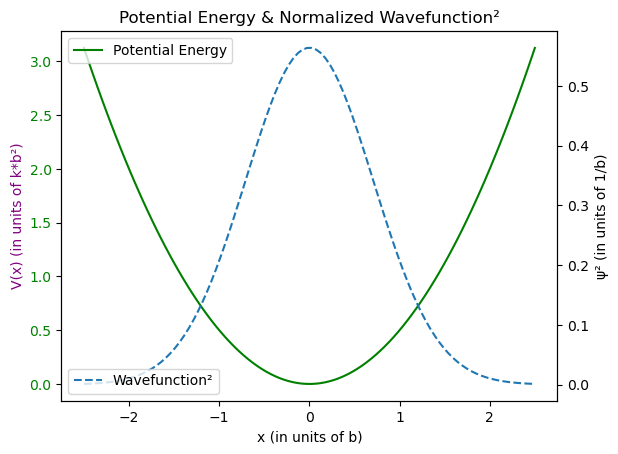

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define dimensionless length
x_dimless = np.linspace(-2.5, 2.5, 100)

# Define potential energy function (in units of k * b^2)
V_x = 0.5 * x_dimless**2

# Compute the normalized wavefunction squared (in units of 1/b)
psi_sq_norm = np.exp(-x_dimless**2) / np.sqrt(np.pi)

# Plot potential and wavefunction squared
fig, ax1 = plt.subplots()

# Plot potential energy
ax1.set_xlabel('x (in units of b)')
ax1.set_ylabel('V(x) (in units of k*b²)', color='purple')
ax1.plot(x_dimless, V_x, color='green', label='Potential Energy')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')

# Create a second y-axis for the wavefunction squared
ax2 = ax1.twinx()
ax2.set_ylabel('ψ² (in units of 1/b)')
ax2.plot(x_dimless, psi_sq_norm, label='Wavefunction²', linestyle='dashed')
ax2.legend(loc='lower left')

plt.title('Potential Energy & Normalized Wavefunction²')
plt.show()


### 5. If you look for this particle, what is the probability you find it in the region $|x| > b $?

Note that the function is symmetric around 0

given bounds:
\begin{equation}
2\int_{b}^{∞}\tilde{\psi}(x)^2dx
\end{equation}

plug in the equation:
\begin{equation}
2\int_{b}^{∞}\frac{1}{\sqrt{\pi}b} (e^{-\frac{\hat{x}^2}{2b^2}})dx
\end{equation}

Use U substitution, $ u = \frac{x}{b}, dx = b*\delta u$ gives:
\begin{equation}
2\int_{1}^{∞}\frac{1}{\sqrt{\pi}}e^{-u^2}du
\end{equation}

plugging this into Wolfram alpha gives a probability of .1573

### 6. Is your normalized $\tilde{\psi}(x)$ a solution of your Schr&ouml;dinger equation? If so, what is its total energy?  (*Hint*: $\dfrac{d^2}{dx^2}e^{-ax^2} = 2 a e^{-ax^2} \left (2a x^2 -1\right)$. You can leave your answer in terms of $k$ and $b$.)

Given our solution to question 1:
\begin{equation}
-\frac{\hbar^2}{2m}\frac{\delta^2\tilde{\psi}(x)}{\delta x^2} + \frac{1}{2}kx^2\tilde{\psi}(x)
\end{equation}

Given our normalized Normalized $\tilde{\psi}(x)$:

\begin{equation}
\tilde{\psi}(x)= \sqrt{\frac{1}{\pi^{1/2}b}}*e^{-\frac{x^2}{2b^2}}
\end{equation}

We want to show that using our normalized equation that we get a scalar value =E
\begin{equation}
-\frac{\hbar^2}{2m}\frac{\delta^2\tilde{\psi}(x)}{\delta x^2} + \frac{1}{2}kx^2\tilde{\psi}(x)=E\tilde{\psi}(x)
\end{equation}

We'll start with evaluating the second derivative of the first term :
\begin{equation}
\frac{\delta^2\tilde{\psi}(x)}{\delta x^2}=\frac{\delta^2}{\delta x^2}\sqrt{\frac{1}{\pi^{1/2}b}}*e^{-\frac{x^2}{2b^2}}
\end{equation}

use the hint where $a=\frac{1}{2b^2}$ to get
\begin{equation}
\sqrt{\frac{1}{\pi^{1/2}b}} *\frac{1}{b^2}*e^{-\frac{x^2}{2b^2}}*(\frac{1}{b^2}*x^2-1)
\end{equation}

The first and third term are $\tilde{\psi}(x)$, giving you
\begin{equation}
\frac{1}{b^2}\tilde{\psi}(x)(\frac{x^2}{b^2}-1)
\end{equation}

We plug this back into the third equation for the derivative term to get:
\begin{equation}
-\frac{\hbar^2}{2m}(\frac{1}{b^2}\tilde{\psi}(x)(\frac{x^2}{b^2}-1)) + \frac{1}{2}kx^2\tilde{\psi}(x)=E\tilde{\psi}(x)
\end{equation}

Factoring out $\tilde{\psi}(x)$ and removing it from both sides ends up giving you:
\begin{equation}
-\frac{\hbar^2}{2m}\frac{1}{b^2}(\frac{x^2}{b^2}-1)+ \frac{1}{2}kx^2=E
\end{equation}

Simplifying the left side leaves you with:
\begin{equation}
-\frac{\hbar^2x^2}{2mb^4}+\frac{\hbar^2}{2mb^2}+ \frac{1}{2}kx^2=E
\end{equation}

Given in 2: $b=( \hbar^2/mk)^{1/4}$:
\begin{equation}
b^2=(\hbar^2/mk)^{1/2}
\end{equation}

\begin{equation}
b^4=(\hbar^2/mk)
\end{equation}

Plug these in to give:
\begin{equation}
-\frac{\hbar^2mkx^2}{2\hbar^2m}+\frac{\hbar^2m^{1/2}k^{1/2}}{2\hbar m}+ \frac{1}{2}kx^2=E
\end{equation}

First and third term cancel out, simplifying the middle term gives you the total energy and the fact that your normalized wave function is a solution of the schrodinger equation.
\begin{equation}
\frac{\hbar}{2}\sqrt{\frac{k}{m}}=E
\end{equation}

### 7. Is your normalized $\tilde{\psi}(x)$ an eigenfunction of the linear momentum operator? If so, what is its eigenvalue?

Linear Momentum operator
\begin{equation}
\hat{p} = -i\hbar\frac{\delta}{\delta x}
\end{equation}

Normalized $\tilde{\psi}(x)$
\begin{equation}
\tilde{\psi}(x)= \sqrt{\frac{1}{pi^{1/2}b}}*e^{-\frac{x^2}{2b^2}}
\end{equation}

Putting the equations together
\begin{equation}
\hat{p}\tilde{\psi}(x) = -i\hbar\frac{\delta}{\delta x}(\frac{1}{\pi^{1/4}b^{1/2}}*e^{-\frac{x^2}{2b^2}})
\end{equation}

Pull out the constants and evaluate the derivative
\begin{equation}
-\frac{i\hbar}{\pi^{1/4}b^{1/2}}*e^{-\frac{x^2}{2b^2}}*(-\frac{2x}{b^2})
\end{equation}

Simplify where C is some constant
\begin{equation}
C*x*e^{-\frac{x^2}{2b^2}}
\end{equation}

Since there's a factor of $x$, $\tilde{\psi}(x)$ is not an eigenfunction of $\hat{p}$

### 8. If you were to measure the linear momentum of many electrons, all with the same wavefunction $\tilde{\psi}(x)$ , will you get the same answer every time?   

As question 7 showed that our $\tilde{\psi}(x)$ is NOT an eigenfunction of the linear momentum operator
we will NOT get the same answer every time.

### 9. If you were to measure the linear momentum of many electrons, all with the same wavefunction $\tilde{\psi}(x)$ , what will you get on average?

You're looking for the expectation value of the linear momentum

\begin{equation}
<\tilde{\psi}(x)| \hat{p}|\tilde{\psi}(x)>
\end{equation}

We solved $\hat{p}\tilde{\psi}(x)$ above in question 7:
\begin{equation}
\hat{p}\tilde{\psi}(x) = C_1*x*e^{-\frac{x^2}{2b^2}}
\end{equation}

Which gives us the following:
\begin{equation}
<\tilde{\psi}(x)| \hat{p}|\tilde{\psi}(x)> = \int_{-\infty}^{\infty}\tilde{\psi}(x)| \hat{p}|\tilde{\psi}(x)
\end{equation}

Plug in for $\tilde{\psi}(x)$ and $\hat{p}\tilde{\psi}(x)$
\begin{equation}
\int_{-\infty}^{\infty}C_2*e^{-\frac{x^2}{2b^2}}*C_1*x*e^{-\frac{x^2}{2b^2}}
\end{equation}

Pull out constants and simplify the exponential gives:
\begin{equation}
C_3*\int_{-\infty}^{\infty}x*e^{-\frac{x^2}{b^2}}
\end{equation}

You can note via symmetry that this is an odd function times an even function ergo
\begin{equation}
<\tilde{\psi}(x)| \hat{p}|\tilde{\psi}(x)>= C_3*\int_{-\infty}^{\infty}x*e^{-\frac{x^2}{b^2}} = 0
\end{equation}

### 10. What is the *uncertainty* in the momentum of the electron? (Recall the uncertainty is given by $\Delta p = \sqrt{\langle p^2 \rangle - \langle p \rangle^2}$.)  You can give your answer in units of $m_e$, $\hbar$, and $b$.

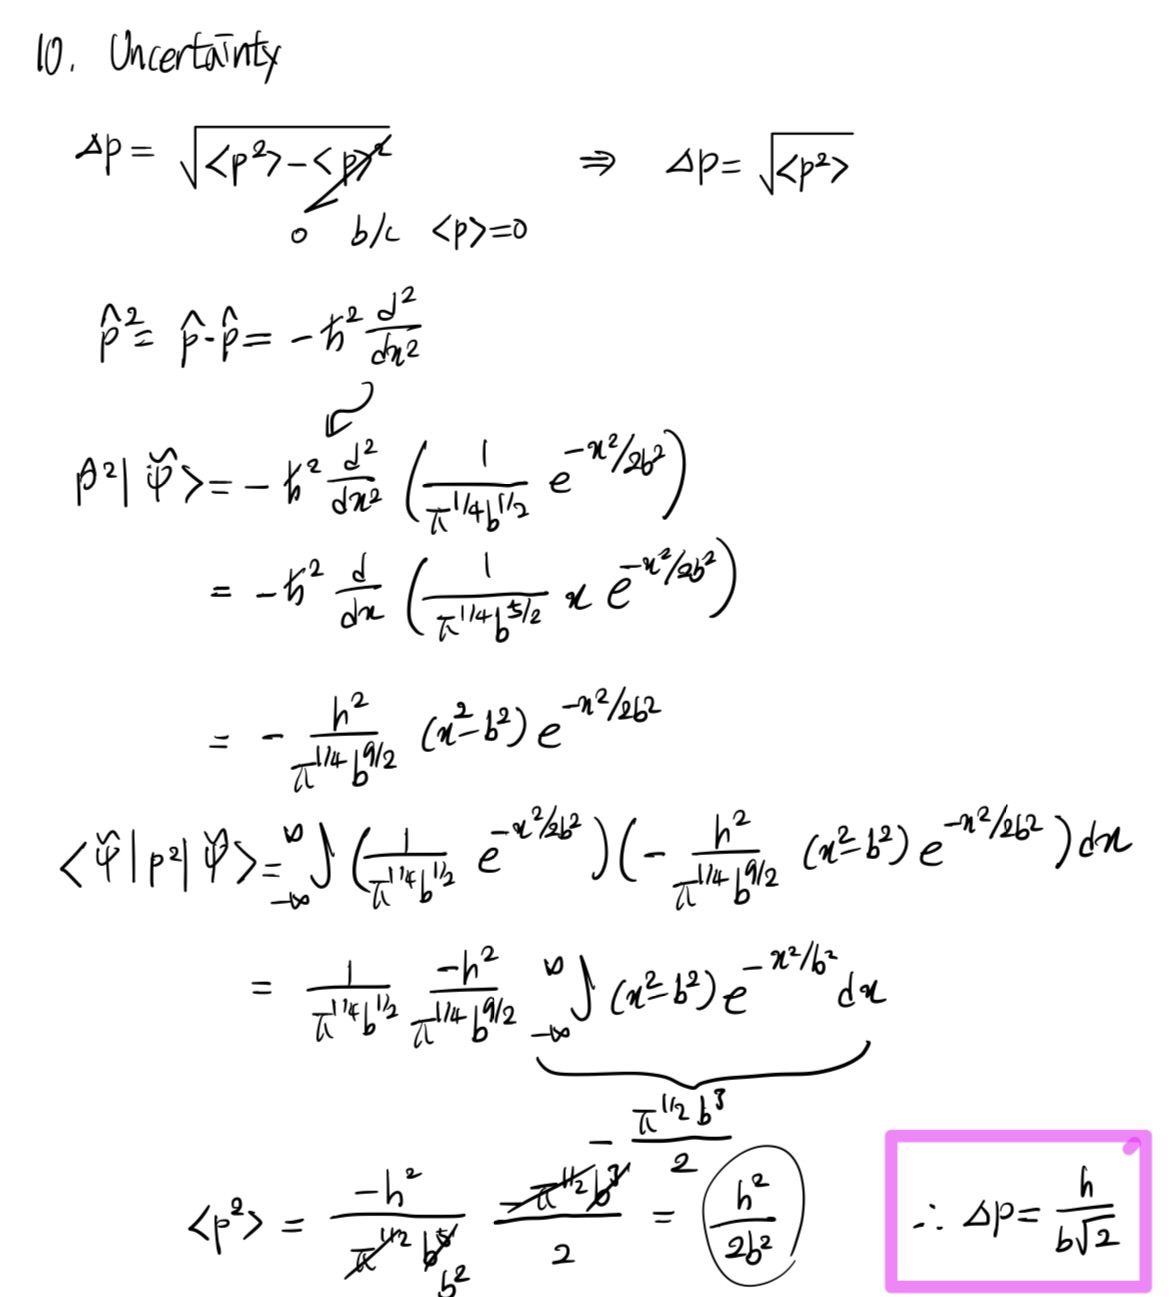

### 11. What is the maximum precision with which you could measure the position of the electron? Give your answer in units of $b$.

### 12. You probably recognize $V(x)$ as the potential for a harmonic oscillator, and you remember that a classic harmonic oscillator always oscillates within some amplitude $A$. Look at $\tilde{\psi}(x)$. Does it go to zero at some $A$?  Or is it non-zero all the way to infinity? (This is your first exposure to tunneling!)

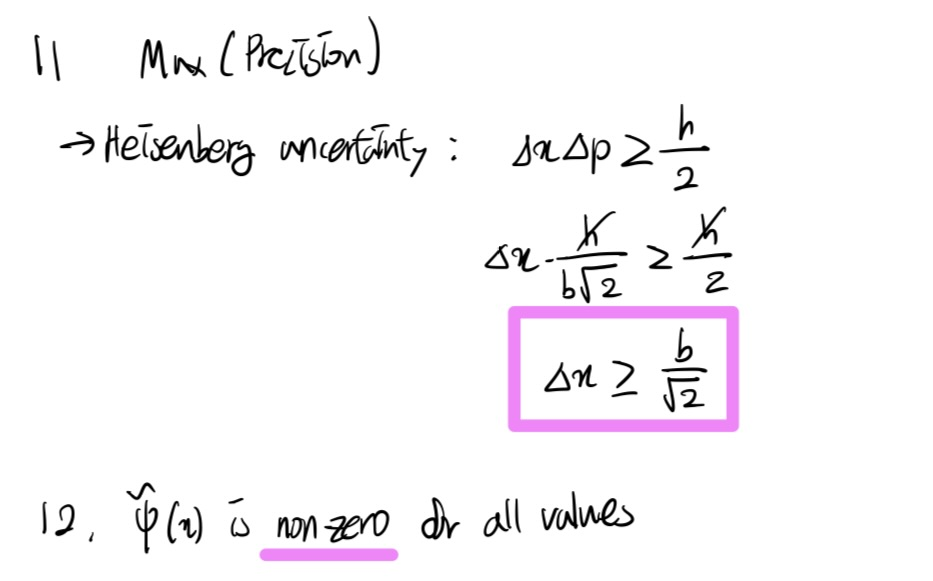